Data Loaded Successfully
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        6   5   6   6  
1      5        3      3     1     1      3        4   5   5   6  
2      4        3      2     2     3      3       10   7   8  10  
3      3        2      2     1     1      5        2  15  14  15  
4      4        3      2     1     2      5        4   6  10  10  

[5 rows x 33 columns]

Dataset Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex:

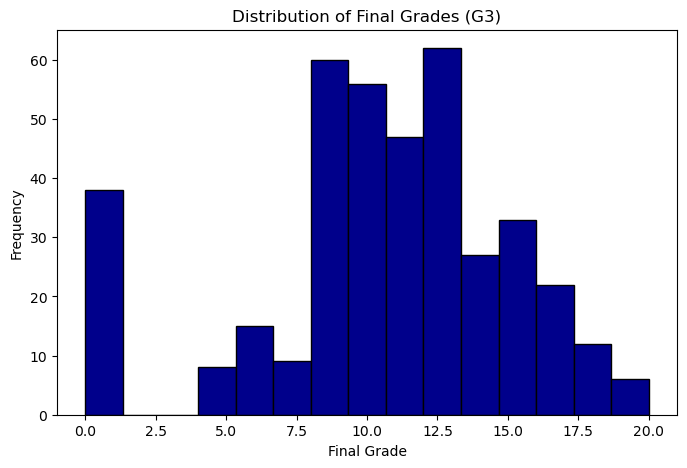

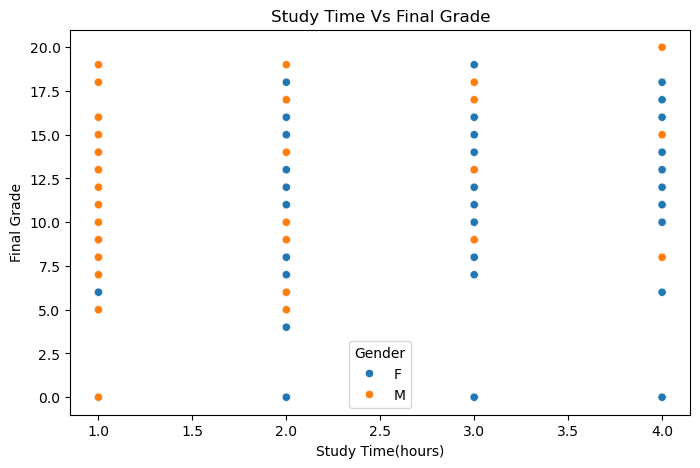

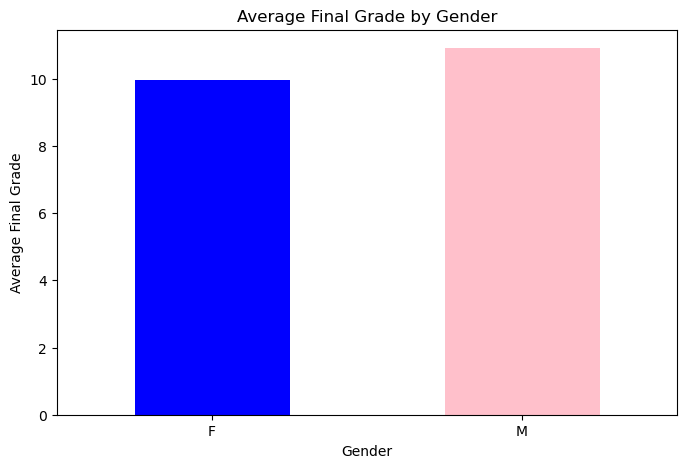

In [1]:
#importing libaries 
import pandas as pd 
import matplotlib.pyplot as mlt 
import seaborn as sns

#step 1: Load the Dataset 
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
dataset_path = "student-mat.csv"

# Download and load the dataset 
import urllib.request
import zipfile

# Download the dataset
urllib.request.urlretrieve(url, "student.zip")

#Extract the dataset
with zipfile.ZipFile("student.zip", "r") as zip_ref:
    zip_ref.extractall(".")
    
#loading the Dataset into a Dataframe
dataset = pd.read_csv('student-mat.csv', sep=";")
print("Data Loaded Successfully")

# Step 2. Data Exploration
#Display the first few rows in the dataframe
print(dataset.head())
print("\nDataset Info")
print(dataset.info())

# Step 3. Data Cleaning
#Checking for missing values 
print("\n Missing Values:")
print(dataset.isnull().sum())

#Removing duplicate entries
print(dataset.drop_duplicates())

# Step 4. Data Analysis
# Question 1. What is the average score in math (G3)?
average_score = dataset['G3'].mean()
print(f"Average Math Score (G3): {average_score:.2f}")

# Question 2. How many students scored above 15 in their final grade (G3)?
students_scores_above_15 = len(dataset[dataset['G3'] > 15])
print(f"Number of students that scored above 15: {students_scores_above_15}")

# Question 3. Is there a correlation between study time (study time) and the final grade (G3)?
correlation = dataset['studytime'].corr(dataset['G3'])
print(f"Correlation between study time and final grade: {correlation:.2f}")

# Question 4. Which gender has a higher average final grade (G3)?
average_grade_by_gender = dataset.groupby('sex')['G3'].mean()
print(f"\nAverage Final Grade by Gender:" )
print (average_grade_by_gender)

# Step 5: Data Visualization
#Histogram of final grades
mlt.figure(figsize=(8,5))
mlt.hist(dataset['G3'], bins = 15, color = 'Darkblue', edgecolor= 'black')
mlt.title("Distribution of Final Grades (G3)")
mlt.xlabel("Final Grade")
mlt.ylabel("Frequency")
mlt.show()

#Scatter plot between study time and final grade
mlt.figure(figsize=(8,5))
sns.scatterplot(data=dataset, x= 'studytime', y='G3', hue='sex')
mlt.title("Study Time Vs Final Grade")
mlt.xlabel("Study Time(hours)")
mlt.ylabel("Final Grade")
mlt.legend(title= "Gender")
mlt.show()

#Bar chart of the average scores of male and female students
mlt.figure(figsize=(8,5))
average_grade_by_gender.plot(kind='bar', color=['blue','pink'])
mlt.title("Average Final Grade by Gender")
mlt.ylabel("Average Final Grade")
mlt.xlabel("Gender")
mlt.xticks(rotation=0)
mlt.show()
